In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import nlp
import tensorflow as tf
import random
import os
%matplotlib inline

def show_history(h):
    # 각 손실된 학습의 횟수 모니터링
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(9, 9))
    
    # 1행 2열의 플로팅
    plt.subplot(1, 2, 1)
    
    # 훈련 데이터
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'),
            label='Training')
    
    # 검증 데이터
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'),
            label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    
    # 훈련 데이터에 대한 손실 플로팅
    plt.plot(range(0, epochs_trained), h.history.get('loss'), 
            label='Training')
    
    # 검증 데이터에 대한 손실 플로팅
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'),
            label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    
    

In [2]:
from sklearn.metrics import confusion_matrix
# 혼동 매트릭스 정의

def dshow_confusion_matrix(y_true, y_pred, classes):
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    plt.figure(figsize=(9, 9))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

In [3]:
def create_model_checkpoint(model_name, save_path="./model_checkpoints"):
    # 모델 저장 파일 경로 생성
    
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(
    save_path, model_name), monitor="val_loss", verbose=0,
                                             save_best_only=True)


In [4]:
# 데이터 가져오기
data = nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Using custom data configuration default


Downloading: 0.00B [00:00, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to C:\Users\Ahn_YeongHoo\.cache\huggingface\datasets\emotion\default\0.0.0\84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [5]:
data

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [6]:
train = data['train']
val = data['validation']
test = data['test']


In [7]:
# 트윗과 라벨 추출 함수 정의
def get_tweet_data(data):
    tweets=[x['text'] for x in data]
    emotions=[x['label'] for x in data]
    return tweets, emotions


In [8]:
tweets,emotions = get_tweet_data(train)

tweets[:10], emotions[:10]

(['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
  'i feel as confused about life as a teenager or as jaded as a year old man',
  'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
  'i feel romantic too'],
 ['sadness',
  'sadness',
  'anger',
  'love',
  'anger',
  'sadness',
  'surprise',
  'fear',
  'joy',
  'love'])

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token='<out_of_vocal>')
tokenizer.fit_on_texts(tweets)

tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [10]:
length=[len(t.split(' ')) for t in tweets]
length[:10]

[4, 21, 10, 18, 4, 12, 23, 17, 19, 4]

In [11]:
# 평귤 길이 계산 함수
def get_average(data):
    count = 0
    d_len = 0
    for d in data:
        d_len = d_len + len(d.split(' '))
        count = count + 1
    avg = d_len / count
    return avg


In [12]:
get_average(tweets)

19.1663125

(array([  8.,  45., 310., 488., 539., 625., 626., 629., 613., 636., 654.,
        655., 608., 622., 609., 603., 559., 535., 530., 510., 452., 430.,
        382., 385., 330., 327., 336., 317., 238., 208., 200., 200., 167.,
        157., 141., 144., 120., 117., 117.,  88.,  96.,  72.,  66.,  66.,
         65.,  52.,  37.,  43.,  30.,  32.,  31.,  26.,  30.,  20.,  23.,
         14.,   9.,  10.,   4.,   4.,   4.,   1.,   4.,   1.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.]),
 <BarContainer object of 64 artists>)

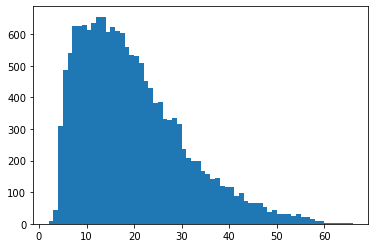

In [13]:
# 평균은 좋은 방법이 아니므로, 히스토그램으로 표현
plt.hist(length, bins=len(set(length)))